In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('predictive_adr.csv')
data.head()

,ID,STATUS,REGION,ACC_AIR_CNT,ACC_CHET_UL_FLG,ACC_LAND_CNT,ACC_OBJ_CNT,ACC_TRANS_CNT,ACC_OTHER_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,...,ID_VID_POST,LESS_YEAR,P_FIRST_STATUS,IDREG_BAD,ACTUAL_FOR_PROV,P_DTSTATUS,BLOCKED_SCHET_UL_FLG,BLOCKED_SCHET_UL_CNT,RUK_PROVIDE_2NDFL_FLG,DT_PROCESSING
0,6404075,5,24.0,0,0,0,0,0,0,0,...,11,0,100,0,0,19.12.2022 09:37,0,0,0,19.12.2022 22:30
1,6404010,6,14.0,0,0,0,0,0,0,0,...,11,0,100,0,0,19.12.2022 12:26,1,1,0,19.12.2022 22:30
2,6404011,5,25.0,0,0,0,0,0,0,0,...,4,0,100,150000275654821,0,14.02.2023 10:29,0,0,0,19.12.2022 22:30
3,6404014,5,65.0,0,1,0,0,23,0,23,...,11,0,100,0,0,19.12.2022 14:44,0,0,0,19.12.2022 22:30
4,6404088,5,24.0,0,1,0,0,0,0,0,...,11,1,100,0,0,16.01.2023 15:52,1,1,0,19.12.2022 22:30


In [3]:
data.shape

(97094, 54)

In [4]:
char = pd.read_excel('Показатели_для_проверки_к_выборке.xlsx')
char.head()

,описание,название
0,Признак наличия счетов у юл,ACC_CHET_UL_FLG
1,Количество открытых счетов у юл,OPEN_CHET_UL_CNT
2,Признак высокого налогового риска,HIGH_RISK_FLG
3,Признак участия ЮЛ в схемах ухода от налогообл...,UL_UKL_FLG
4,Количество текущих постановок на учет объектов...,ACC_OBJ_CNT\nACC_OBJ_CNT\nACC_LAND_CNT\nACC_TR...


In [5]:
all = list(char['название'])
all

['ACC_CHET_UL_FLG',
 'OPEN_CHET_UL_CNT',
 'HIGH_RISK_FLG',
 'UL_UKL_FLG',
 'ACC_OBJ_CNT\nACC_OBJ_CNT\nACC_LAND_CNT\nACC_TRANS_CNT\nACC_AIR_CNT\nACC_OTHER_TRANS_CNT\nACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_OBJ_CNT\nRUK_ACC_OBJ_CNT\nRUK_ACC_LAND_CNT\nRUK_ACC_TRANS_CNT\nRUK_ACC_AIR_CNT\nRUK_ACC_OTHER_TRANS_CNT\nRUK_ACC_ALL_OBJ_PROPS_CNT',
 'UCH_ACC_OBJ_CNT\nUCH_ACC_LAND_CNT\nUCH_ACC_TRANS_CNT\nUCH_ACC_AIR_CNT\nUCH_ACC_OTHER_TRANS_CNT\nUCH_ACC_ALL_OBJ_PROPS_CNT',
 'RUK_RUK_REG_CHANGE_CNT',
 'RUK_UCHR_REG_CHANGE_CNT',
 'UCHR_RUK_REG_CHANGE_CNT',
 'UCHR_UCHR_REG_CHANGE_CNT',
 'REGION_INEQ_UL_RUK_FLG',
 'REGION_INEQ_UL_UCH_FLG',
 'NO_OTCHET_FLG',
 'BLOCKED_SCHET_UL_FLG\nBLOCKED_SCHET_UL_CNT',
 'SINGLE_RUK_UCH_FL_FLG\nSINGLE_RUK_UCH_UL_FLG',
 'RUK_PROVIDE_2NDFL_FLG']

In [6]:
res = []
for sub in range(len(all)):
    words = all[sub].split('\n')
    res.append(words)

In [7]:
all_splited = []
for a in range(len(res)):
    for b in range(len(res[a])):
        all_splited.append(res[a][b])

In [8]:
all_splited

['ACC_CHET_UL_FLG',
 'OPEN_CHET_UL_CNT',
 'HIGH_RISK_FLG',
 'UL_UKL_FLG',
 'ACC_OBJ_CNT',
 'ACC_OBJ_CNT',
 'ACC_LAND_CNT',
 'ACC_TRANS_CNT',
 'ACC_AIR_CNT',
 'ACC_OTHER_TRANS_CNT',
 'ACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_LAND_CNT',
 'RUK_ACC_TRANS_CNT',
 'RUK_ACC_AIR_CNT',
 'RUK_ACC_OTHER_TRANS_CNT',
 'RUK_ACC_ALL_OBJ_PROPS_CNT',
 'UCH_ACC_OBJ_CNT',
 'UCH_ACC_LAND_CNT',
 'UCH_ACC_TRANS_CNT',
 'UCH_ACC_AIR_CNT',
 'UCH_ACC_OTHER_TRANS_CNT',
 'UCH_ACC_ALL_OBJ_PROPS_CNT',
 'RUK_RUK_REG_CHANGE_CNT',
 'RUK_UCHR_REG_CHANGE_CNT',
 'UCHR_RUK_REG_CHANGE_CNT',
 'UCHR_UCHR_REG_CHANGE_CNT',
 'REGION_INEQ_UL_RUK_FLG',
 'REGION_INEQ_UL_UCH_FLG',
 'NO_OTCHET_FLG',
 'BLOCKED_SCHET_UL_FLG',
 'BLOCKED_SCHET_UL_CNT',
 'SINGLE_RUK_UCH_FL_FLG',
 'SINGLE_RUK_UCH_UL_FLG',
 'RUK_PROVIDE_2NDFL_FLG']

In [19]:
my_string = "hello\nworld\n"
new_string = ' '.join(my_string.split('\n'))
new_string

'hello world '

In [22]:
sentence = new_string
words = my_string.split('\n')

In [23]:
words

['hello', 'world', '']

# Анализ данных

В этом разделе проведем анализ данных с целью отсечения лишнего и оптимизации обучения:

<AxesSubplot:>

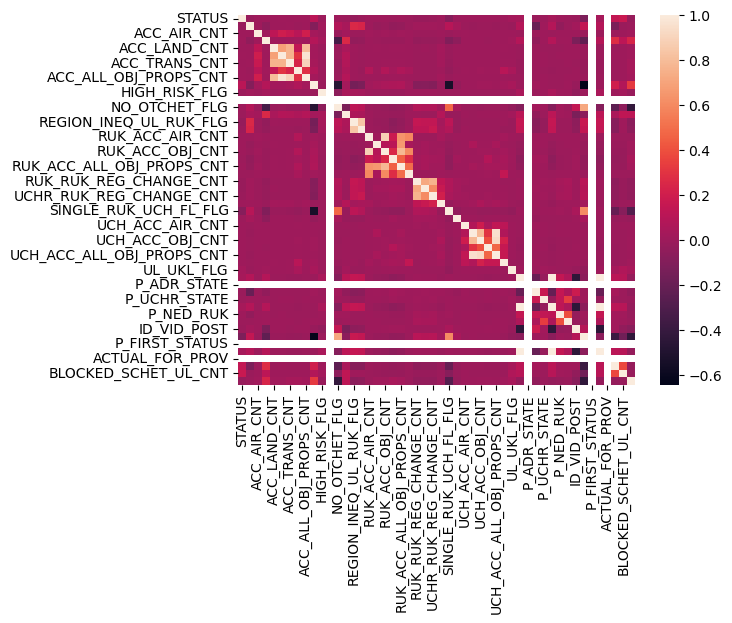

In [4]:
sns.heatmap(data.drop(['ID', 'DT_PROCESSING'], axis=1).corr())

Рассмотри признаки, корреляция между которыми больше 0.5:

In [12]:
def no_corr(df, corr_ratio):
    index = list(zip(list(np.where(df.corr() > corr_ratio)[0]), list(np.where(df.corr() > corr_ratio)[1])))
    non_diag = []
    
    for i in range(len(index)):
        if index[i][0] != index[i][1]:
            non_diag.append(index[i])   
    no2_diag = []
    
    for i in range(len(non_diag)):
        ii = set(non_diag[i])
        no2_diag.append(ii)
    
    korr_ind = sorted([t for t in (set(tuple(i) for i in no2_diag))]) #removeDuplicates(no2_diag))
    
    vc0 = pd.DataFrame(pd.DataFrame(korr_ind)[0].value_counts())# > 1
    vc1 = pd.DataFrame(pd.DataFrame(korr_ind)[1].value_counts())# > 1
    
    len0 = len(np.where(pd.DataFrame(korr_ind)[0].value_counts() > 1)[0])
    len1 = len(np.where(pd.DataFrame(korr_ind)[1].value_counts() > 1)[0])
    
    repeat_ind = sorted(list(vc0.iloc[0:len0].index) + list(vc1.iloc[0:len1].index))
    
    columns = list(df.columns[repeat_ind])
    
    return columns
    
    

In [52]:
no_corr(data.drop(['ID', 'DT_PROCESSING'], axis=1), 0.5)

['ACC_LAND_CNT',
 'ACC_OBJ_CNT',
 'ACC_TRANS_CNT',
 'ACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_AIR_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_OTHER_TRANS_CNT',
 'RUK_UCHR_REG_CHANGE_CNT',
 'UCHR_RUK_REG_CHANGE_CNT',
 'UCH_ACC_OBJ_CNT',
 'UCH_ACC_ALL_OBJ_PROPS_CNT',
 'P_STATUS',
 'P_UCHR_STATE']

In [5]:
index = list(zip(list(np.where(data.drop(['ID', 'DT_PROCESSING'], axis=1).corr() > 0.5)[0]), list(np.where(data.drop(['ID', 'DT_PROCESSING'], axis=1).corr() > 0.5)[1])))

In [6]:
non_diag = []
for i in range(len(index)):
    if index[i][0] != index[i][1]:
        non_diag.append(index[i])

In [7]:
no2_diag = []
for i in range(len(non_diag)):
    ii = set(non_diag[i])
    no2_diag.append(ii)

In [8]:
def removeDuplicates(lst):     
    return [t for t in (set(tuple(i) for i in lst))]

Координаты (т.е. индексы столбцов) тех признаков, у которых значение матрицы корреляции больше 0.5:

In [9]:
korr_ind = sorted(removeDuplicates(no2_diag))
korr_ind

[(4, 5),
 (4, 6),
 (5, 6),
 (8, 4),
 (8, 5),
 (8, 6),
 (14, 15),
 (16, 18),
 (16, 20),
 (16, 21),
 (17, 20),
 (18, 20),
 (18, 21),
 (22, 23),
 (24, 22),
 (24, 23),
 (26, 43),
 (29, 30),
 (32, 29),
 (32, 30),
 (35, 39),
 (35, 45),
 (43, 12),
 (45, 39)]

Ищем индексы тех столбцов, которые встречались более одного раза в матрице корреляций со значением корреляции больше 0.5:

In [10]:
vc0 = pd.DataFrame(pd.DataFrame(korr_ind)[0].value_counts())# > 1
vc1 = pd.DataFrame(pd.DataFrame(korr_ind)[1].value_counts())# > 1

In [11]:
len0 = len(np.where(pd.DataFrame(korr_ind)[0].value_counts() > 1)[0])
len1 = len(np.where(pd.DataFrame(korr_ind)[1].value_counts() > 1)[0])

In [12]:
repeat_ind = sorted(list(vc0.iloc[0:len0].index) + list(vc1.iloc[0:len1].index))
repeat_ind

[4, 5, 6, 8, 16, 18, 20, 21, 23, 24, 30, 32, 35, 39]

In [13]:
data_to_delete = []
for d in range(len(repeat_ind)):
    dele = data[data.columns[repeat_ind[d]]]
    data_to_delete.append(dele)
    
pd_to_delete = pd.DataFrame(list(zip(*data_to_delete)), columns=data.columns[repeat_ind])

Фрейм данных, который можно выкинуть из модели ввиду выской скореллированности этих данных между собой:

In [14]:
pd_to_delete 

,ACC_CHET_UL_FLG,ACC_LAND_CNT,ACC_OBJ_CNT,ACC_OTHER_TRANS_CNT,REGION_INEQ_UL_UCH_FLG,RUK_ACC_LAND_CNT,RUK_ACC_TRANS_CNT,RUK_ACC_ALL_OBJ_PROPS_CNT,RUK_RUK_REG_CHANGE_CNT,RUK_UCHR_REG_CHANGE_CNT,UCH_ACC_LAND_CNT,UCH_ACC_TRANS_CNT,UL_UKL_FLG,P_RUK_STATE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,7,0,0,1,0,0,1
2,0,0,0,0,0,1,0,2,0,0,1,0,0,0
3,1,0,0,0,0,0,42,44,0,0,0,76,0,1
4,1,0,0,0,0,0,2,2,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,1,0,0,0,0,0,0,1,0,0,0,0,0,1
97090,1,0,0,0,0,0,0,0,0,0,0,0,0,0
97091,1,0,0,0,0,0,0,0,0,0,0,0,0,0
97092,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Количество 0 и 1 в целевом столбце:

In [26]:
data['P_NED_ADR'].value_counts()

0    75851
1    21243
Name: P_NED_ADR, dtype: int64

<AxesSubplot:>

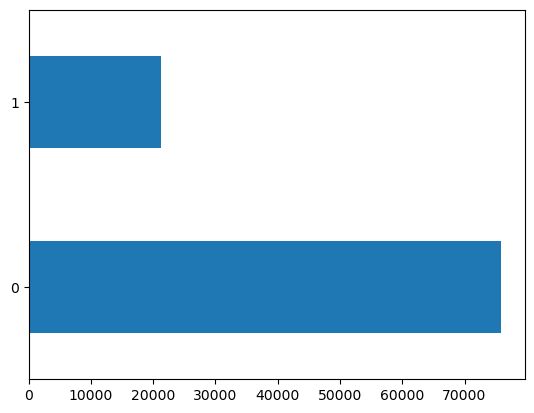

In [28]:
data['P_NED_ADR'].value_counts().plot(kind='barh')

Уникальные ID:

In [31]:
len(data['ID'].unique()), len(data['ID'])

(97094, 97094)

## Уникальные статусы

In [32]:
len(data['STATUS'].unique()), len(data['STATUS'])

(21, 97094)

In [34]:
data['STATUS'].value_counts()#.plot(kind='barh')

5      93356
6       1448
107      597
105      516
117      492
12       232
114       91
113       77
124       74
132       66
45        49
121       24
415       15
23        15
131       15
14         7
17         6
30         5
122        4
116        3
123        2
Name: STATUS, dtype: int64

In [68]:
STATUS_list = pd.DataFrame(data['STATUS'].value_counts())
STATUS_list

,STATUS
5,93356
6,1448
107,597
105,516
117,492
12,232
114,91
113,77
124,74
132,66


Сделаем разбивку датафрейма по статусам:

In [60]:
data_status_list = []
for s in range(len(STATUS_list)):
    data_status_s = data[data['STATUS'] == list(STATUS_list.index)[s]]
    data_status_list.append(data_status_s)

In [70]:
data_status_P_NED_list = []
for ss in range(STATUS_list.shape[0]):
    data_status_P_NED_ss = data_status_list[ss]['P_NED_ADR'].value_counts()
    data_status_P_NED_list.append(data_status_P_NED_ss)

In [77]:
lists_0_1 = []
for q in range(STATUS_list.shape[0]):
    lists_0_1_q = list(data_status_P_NED_list[q])
    lists_0_1.append(lists_0_1_q)


Фрейм данных по целевому признаку в зависимости от статуса:

In [82]:
df_status_0_1 = pd.DataFrame(lists_0_1, index=list(STATUS_list.index)).fillna(0)
df_status_0_1

,0,1
5,73082,20274.0
6,1166,282.0
107,329,268.0
105,312,204.0
117,418,74.0
12,220,12.0
114,67,24.0
113,58,19.0
124,65,9.0
132,60,6.0


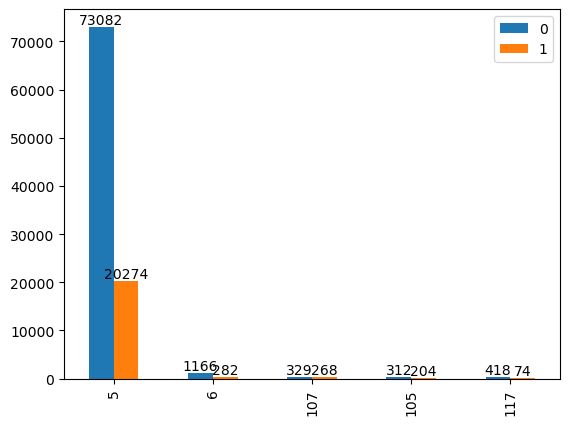

In [92]:
ax = df_status_0_1.iloc[0:5].plot.bar()

#annotate bars in bar plot
for container in ax.containers :
 ax.bar_label(container)

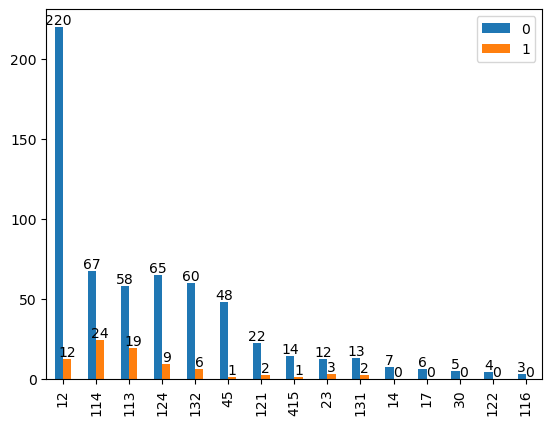

In [93]:
ax = df_status_0_1.iloc[5:-1].plot.bar()

#annotate bars in bar plot
for container in ax.containers :
 ax.bar_label(container)

## Регионы

In [94]:
len(data['REGION'].unique()), len(data['REGION'])

(87, 97094)

In [103]:
vc_REGION = data['REGION'].value_counts()#.plot(kind='barh')
vc_REGION

77.0    21377
50.0     9650
78.0     6146
66.0     3346
54.0     2885
        ...  
79.0       40
83.0       23
6.0        10
87.0        6
99.0        1
Name: REGION, Length: 86, dtype: int64

In [100]:
REGION_list = pd.DataFrame(data['REGION'].value_counts())
REGION_list

,REGION
77.0,21377
50.0,9650
78.0,6146
66.0,3346
54.0,2885
...,...
79.0,40
83.0,23
6.0,10
87.0,6


In [101]:
data_REGION_list = []
for s in range(len(REGION_list)):
    data_REGION_s = data[data['REGION'] == list(REGION_list.index)[s]]
    data_REGION_list.append(data_REGION_s)

In [107]:
data_REGION_P_NED_list = []
for ss in range(REGION_list.shape[0]):
    data_REGION_P_NED_ss = data_REGION_list[ss]['P_NED_ADR'].value_counts()
    data_REGION_P_NED_list.append(data_REGION_P_NED_ss)

In [109]:
lists_REGION_0_1 = []
for q in range(REGION_list.shape[0]):
    lists_REGION_0_1_q = list(data_REGION_P_NED_list[q])
    lists_REGION_0_1.append(lists_REGION_0_1_q)

In [110]:
df_REGION_0_1 = pd.DataFrame(lists_REGION_0_1, index=list(REGION_list.index)).fillna(0)
df_REGION_0_1

,0,1
77.0,15172,6205.0
50.0,8384,1266.0
78.0,3715,2431.0
66.0,2889,457.0
54.0,2549,336.0
...,...,...
79.0,39,1.0
83.0,20,3.0
6.0,7,3.0
87.0,5,1.0


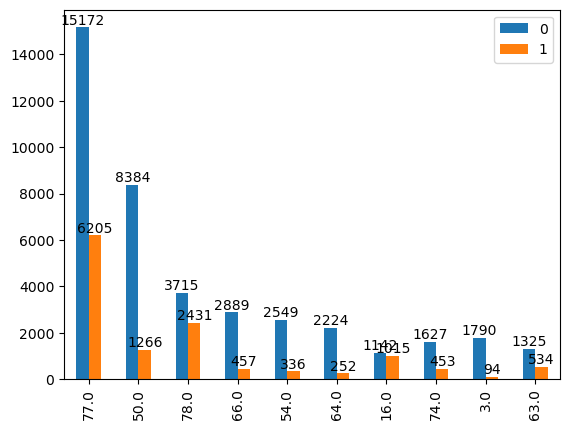

In [112]:
ax = df_REGION_0_1.iloc[0:10].plot.bar()

#annotate bars in bar plot
for container in ax.containers:
    ax.bar_label(container)

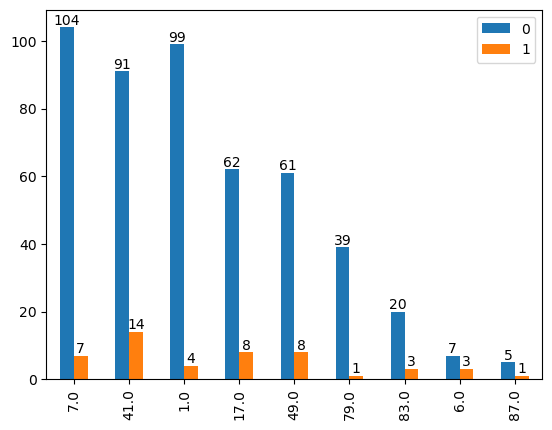

In [113]:
ax = df_REGION_0_1.iloc[-10:-1].plot.bar()

#annotate bars in bar plot
for container in ax.containers:
    ax.bar_label(container)

In [25]:
data['P_FIRST_STATUS'].value_counts()

100    97094
Name: P_FIRST_STATUS, dtype: int64

<AxesSubplot:>

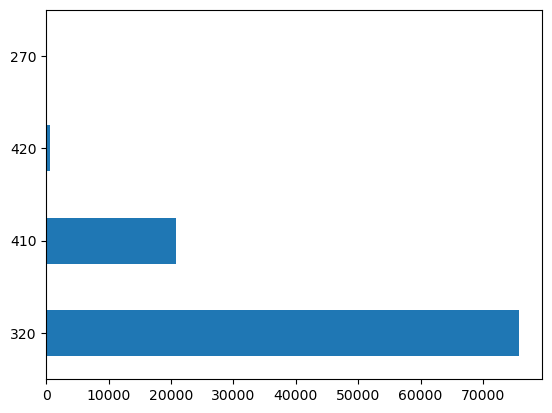

In [24]:
data['P_STATUS'].value_counts().plot(kind='barh')

<AxesSubplot:>

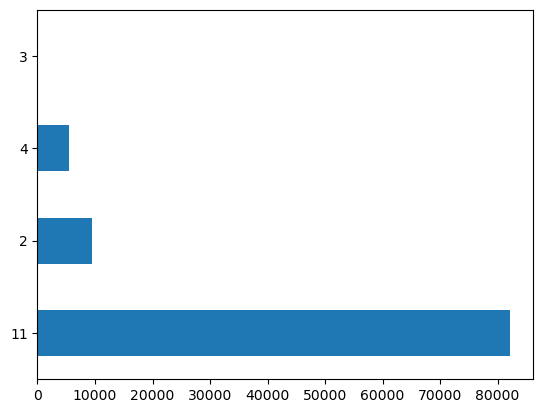

In [75]:
data['ID_VID_POST'].value_counts().plot(kind='barh')

## Препроцессинг; Разделение на обучающую и тестовую выборки; Обучение

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [19]:
X_droped, Y = data.drop(['ID', 'P_NED_ADR', 'DT_PROCESSING', 'P_DTSTATUS', 'P_DTZAP', 'P_FIRST_STATUS', 'IDREG_BAD']
                        + list(data.columns[repeat_ind]), axis=1), data['P_NED_ADR']

Колонки, в которых записаны только 0 или 1:

In [20]:
binary_cols = []
for xx in range(len(X_droped.columns)):
    if len(data[X_droped.columns[xx]].value_counts()) == 2:
        binary_cols.append(X_droped.columns[xx])
binary_cols

['HIGH_RISK_FLG',
 'NO_OTCHET_FLG',
 'REGION_INEQ_UL_RUK_FLG',
 'SINGLE_RUK_UCH_FL_FLG',
 'SINGLE_RUK_UCH_UL_FLG',
 'P_UCHR_STATE',
 'P_NED_RUK',
 'P_NED_UCHR',
 'LESS_YEAR',
 'BLOCKED_SCHET_UL_FLG',
 'RUK_PROVIDE_2NDFL_FLG']

Функция, которая из категориального столбца делает фрейм данных:

In [24]:
def column_to_ohe(data, column_name):
    onehotencoder_col = OneHotEncoder()
    data[column_name] = data[column_name].fillna(data[column_name].mode()[0])
    ohe_col = onehotencoder_col.fit_transform(data[[column_name]])
    col_cat_names = []
    for t in range(len(list(onehotencoder_col.categories_[0]))):
        col_t  = f'{column_name}_{int(list(onehotencoder_col.categories_[0])[t])}'
        col_cat_names.append(col_t)
    
    ohe_col_df = pd.DataFrame(ohe_col.toarray(), columns=col_cat_names).astype(int)
    
    return ohe_col_df 
    

Категориальные столбцы в X: 

In [22]:
categ_cols = ['STATUS', 'REGION', 'P_STATUS', 'ID_VID_POST']

In [23]:
categ_frame = []
for c in range(len(categ_cols)):
    categ_c = column_to_ohe(data, categ_cols[c])
    categ_frame.append(categ_c)

In [24]:
categ_frame[-1]

,ID_VID_POST_2,ID_VID_POST_3,ID_VID_POST_4,ID_VID_POST_11
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
97089,0,0,0,1
97090,0,0,0,1
97091,0,0,0,1
97092,0,0,0,1


Удалим все категориальные (в том числе и бинарные) колонки из фрейма данных:

In [25]:
X_new_droped = X_droped.drop(binary_cols+categ_cols, axis=1)

In [26]:
X_new_droped

,ACC_AIR_CNT,ACC_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,CREATE_DAYS_CNT,INTEGRATE_FLG,OPEN_CHET_UL_CNT,RUK_ACC_AIR_CNT,RUK_ACC_OBJ_CNT,RUK_ACC_OTHER_TRANS_CNT,UCHR_RUK_REG_CHANGE_CNT,UCHR_UCHR_REG_CHANGE_CNT,UCH_ACC_AIR_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OTHER_TRANS_CNT,P_ADR_STATE,ACTUAL_FOR_PROV,BLOCKED_SCHET_UL_CNT
0,0,0,0,1502,0,0,0,0,0,0,0,0,4,4,0,1,0,0
1,0,0,0,5626,0,0,0,6,0,0,0,0,6,7,0,1,0,1
2,0,0,0,2862,0,0,0,1,0,0,0,0,1,2,0,1,0,0
3,0,23,23,5136,0,1,0,2,0,0,0,0,4,80,0,1,0,0
4,0,0,0,97,0,1,0,0,0,0,0,0,0,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,0,0,0,477,0,2,0,1,0,0,0,0,1,1,0,1,0,4
97090,0,0,0,947,0,4,0,0,0,0,0,0,0,0,0,1,0,24
97091,0,0,0,861,0,4,0,0,0,0,0,0,0,0,0,1,0,20
97092,0,0,0,1196,0,2,0,0,0,0,0,0,0,0,0,1,0,8


Нормализуем оставшиеся колонки:

In [27]:
scaler = preprocessing.StandardScaler().fit(X_new_droped)
X_new_droped_scaled = pd.DataFrame(scaler.transform(X_new_droped), columns=X_new_droped.columns)

In [28]:
X_new_droped_scaled

,ACC_AIR_CNT,ACC_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,CREATE_DAYS_CNT,INTEGRATE_FLG,OPEN_CHET_UL_CNT,RUK_ACC_AIR_CNT,RUK_ACC_OBJ_CNT,RUK_ACC_OTHER_TRANS_CNT,UCHR_RUK_REG_CHANGE_CNT,UCHR_UCHR_REG_CHANGE_CNT,UCH_ACC_AIR_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OTHER_TRANS_CNT,P_ADR_STATE,ACTUAL_FOR_PROV,BLOCKED_SCHET_UL_CNT
0,-0.010627,-0.020444,-0.013974,-0.078583,0.0,-0.414379,-0.005891,-0.131845,-0.006552,-0.171769,-0.061626,-0.009601,-0.000800,-0.015947,-0.021838,0.0,0.0,-0.239165
1,-0.010627,-0.020444,-0.013974,1.729182,0.0,-0.414379,-0.005891,0.319749,-0.006552,-0.171769,-0.061626,-0.009601,0.015068,-0.006377,-0.021838,0.0,0.0,-0.183791
2,-0.010627,-0.020444,-0.013974,0.517576,0.0,-0.414379,-0.005891,-0.056579,-0.006552,-0.171769,-0.061626,-0.009601,-0.024602,-0.022327,-0.021838,0.0,0.0,-0.239165
3,-0.010627,0.629871,0.184804,1.514389,0.0,-0.257817,-0.005891,0.018687,-0.006552,-0.171769,-0.061626,-0.009601,-0.000800,0.226485,-0.021838,0.0,0.0,-0.239165
4,-0.010627,-0.020444,-0.013974,-0.694468,0.0,-0.257817,-0.005891,-0.131845,-0.006552,-0.171769,-0.061626,-0.009601,-0.032536,-0.022327,-0.021838,0.0,0.0,-0.183791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,-0.010627,-0.020444,-0.013974,-0.527894,0.0,-0.101256,-0.005891,-0.056579,-0.006552,-0.171769,-0.061626,-0.009601,-0.024602,-0.025517,-0.021838,0.0,0.0,-0.017668
97090,-0.010627,-0.020444,-0.013974,-0.321869,0.0,0.211868,-0.005891,-0.131845,-0.006552,-0.171769,-0.061626,-0.009601,-0.032536,-0.028707,-0.021838,0.0,0.0,1.089816
97091,-0.010627,-0.020444,-0.013974,-0.359567,0.0,0.211868,-0.005891,-0.131845,-0.006552,-0.171769,-0.061626,-0.009601,-0.032536,-0.028707,-0.021838,0.0,0.0,0.868319
97092,-0.010627,-0.020444,-0.013974,-0.212719,0.0,-0.101256,-0.005891,-0.131845,-0.006552,-0.171769,-0.061626,-0.009601,-0.032536,-0.028707,-0.021838,0.0,0.0,0.203829


Теперь объединим все части:

In [29]:
X = X_new_droped_scaled.join(categ_frame).join(X_droped[binary_cols]).fillna(0)

In [30]:
X 

,ACC_AIR_CNT,ACC_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,CREATE_DAYS_CNT,INTEGRATE_FLG,OPEN_CHET_UL_CNT,RUK_ACC_AIR_CNT,RUK_ACC_OBJ_CNT,RUK_ACC_OTHER_TRANS_CNT,UCHR_RUK_REG_CHANGE_CNT,...,NO_OTCHET_FLG,REGION_INEQ_UL_RUK_FLG,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,P_UCHR_STATE,P_NED_RUK,P_NED_UCHR,LESS_YEAR,BLOCKED_SCHET_UL_FLG,RUK_PROVIDE_2NDFL_FLG
0,-0.010627,-0.020444,-0.013974,-0.078583,0.0,-0.414379,-0.005891,-0.131845,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,0,0
1,-0.010627,-0.020444,-0.013974,1.729182,0.0,-0.414379,-0.005891,0.319749,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,1,0
2,-0.010627,-0.020444,-0.013974,0.517576,0.0,-0.414379,-0.005891,-0.056579,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,0,0
3,-0.010627,0.629871,0.184804,1.514389,0.0,-0.257817,-0.005891,0.018687,-0.006552,-0.171769,...,0,0,0,0,1,0,0,0,0,0
4,-0.010627,-0.020444,-0.013974,-0.694468,0.0,-0.257817,-0.005891,-0.131845,-0.006552,-0.171769,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,-0.010627,-0.020444,-0.013974,-0.527894,0.0,-0.101256,-0.005891,-0.056579,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,1,0
97090,-0.010627,-0.020444,-0.013974,-0.321869,0.0,0.211868,-0.005891,-0.131845,-0.006552,-0.171769,...,1,0,0,0,0,0,0,0,1,0
97091,-0.010627,-0.020444,-0.013974,-0.359567,0.0,0.211868,-0.005891,-0.131845,-0.006552,-0.171769,...,1,0,0,0,0,0,0,0,1,0
97092,-0.010627,-0.020444,-0.013974,-0.212719,0.0,-0.101256,-0.005891,-0.131845,-0.006552,-0.171769,...,1,0,0,0,0,0,0,0,1,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [32]:
X_train

,ACC_AIR_CNT,ACC_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,CREATE_DAYS_CNT,INTEGRATE_FLG,OPEN_CHET_UL_CNT,RUK_ACC_AIR_CNT,RUK_ACC_OBJ_CNT,RUK_ACC_OTHER_TRANS_CNT,UCHR_RUK_REG_CHANGE_CNT,...,NO_OTCHET_FLG,REGION_INEQ_UL_RUK_FLG,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,P_UCHR_STATE,P_NED_RUK,P_NED_UCHR,LESS_YEAR,BLOCKED_SCHET_UL_FLG,RUK_PROVIDE_2NDFL_FLG
7613,-0.010627,-0.020444,-0.013974,-0.471785,0.0,0.055306,-0.005891,-0.056579,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,0,1
49383,-0.010627,-0.020444,-0.013974,0.092812,0.0,0.211868,-0.005891,-0.056579,-0.006552,-0.171769,...,1,0,1,0,0,0,0,0,1,0
60847,-0.010627,-0.020444,-0.013974,-0.735235,0.0,-0.414379,-0.005891,-0.131845,-0.006552,-0.171769,...,1,0,1,0,0,0,0,1,0,0
49148,-0.010627,-0.020444,-0.013974,-0.735673,0.0,-0.414379,-0.005891,-0.131845,-0.006552,-0.171769,...,1,1,1,0,0,0,0,1,0,0
79202,-0.010627,-0.020444,-0.013974,-0.699290,0.0,-0.101256,-0.005891,0.018687,-0.006552,-0.171769,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,13.303530,0.007831,0.081093,1.652470,0.0,0.838116,-0.005891,-0.056579,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,0,1
45891,-0.010627,-0.020444,-0.013974,-0.724715,0.0,-0.257817,-0.005891,0.093952,-0.006552,-0.171769,...,1,0,0,0,0,0,0,1,0,0
42613,-0.010627,-0.020444,-0.013974,0.358016,0.0,-0.101256,-0.005891,-0.056579,-0.006552,1.789629,...,0,1,1,0,0,0,0,0,0,1
43567,-0.010627,-0.020444,-0.013974,1.153187,0.0,-0.101256,-0.005891,-0.056579,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,1,0


In [33]:
#pipe = make_pipeline(StandardScaler(), LogisticRegression())
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
#pipe.fit(X_train, y_train)

In [34]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
logreg.classes_

array([0, 1], dtype=int64)

In [48]:
list(logreg.coef_[0])

[0.043771157423835756,
 0.01746624628613658,
 -0.01807687890795793,
 0.007812011178090604,
 0.0,
 0.029821575895078743,
 -0.007832599893692366,
 -0.018455158173695977,
 -0.004071417935269255,
 0.030513583514538367,
 -0.2655498675635463,
 0.2778350749914356,
 -0.24499900033869415,
 0.1068267035732785,
 0.026793759985934095,
 0.0,
 0.0,
 0.047549063996807896,
 0.009150958260895436,
 0.27457822038861307,
 0.004226753742893809,
 -0.0012706769753259685,
 -0.000671094247532631,
 0.0007270960924764541,
 -0.00036695515897726226,
 0.005548530729742783,
 0.42276933079027257,
 -0.30314997307633706,
 0.008913993061563744,
 0.008316745459361773,
 -0.003828573320127238,
 -0.7831299845088882,
 -0.0019393388003116532,
 -0.00047205779779310855,
 0.01125090975817155,
 -0.00048293297830447854,
 0.0016803624185302195,
 0.013973526065419174,
 -0.001502541740812013,
 -0.5781495046953957,
 0.5173055976928952,
 0.037056900517861924,
 -0.008357056624551905,
 -1.1901457269767877,
 0.01485294530506139,
 -0.01155

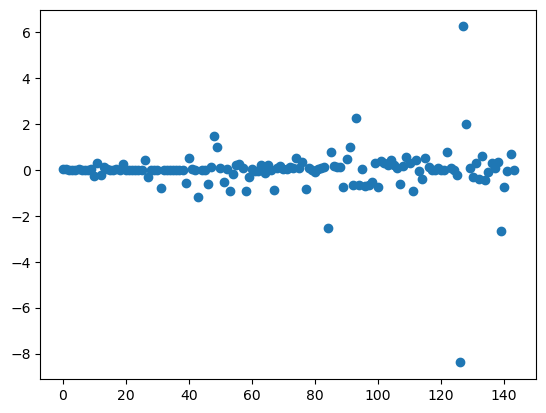

In [50]:
#logreg.intercept_

plt.scatter(range(len(list(logreg.coef_[0]))), list(logreg.coef_[0]))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
logreg.coef_

In [37]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99908619e-01, 9.13812861e-05],
       [8.12048002e-04, 9.99187952e-01],
       [3.22240699e-03, 9.96777593e-01],
       ...,
       [9.99878816e-01, 1.21183663e-04],
       [9.99863598e-01, 1.36401848e-04],
       [9.99828914e-01, 1.71085537e-04]])

In [38]:
y_pred =logreg.predict(X_test)
y_pred 

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [40]:
roc_auc_score(y_test, y_pred)

0.9995243883105216

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matri = confusion_matrix(y_test, y_pred)
print(confusion_matri)

[[18905    18]
 [    0  5351]]


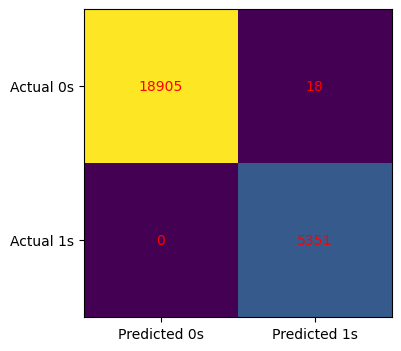

In [42]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18923
           1       1.00      1.00      1.00      5351

    accuracy                           1.00     24274
   macro avg       1.00      1.00      1.00     24274
weighted avg       1.00      1.00      1.00     24274



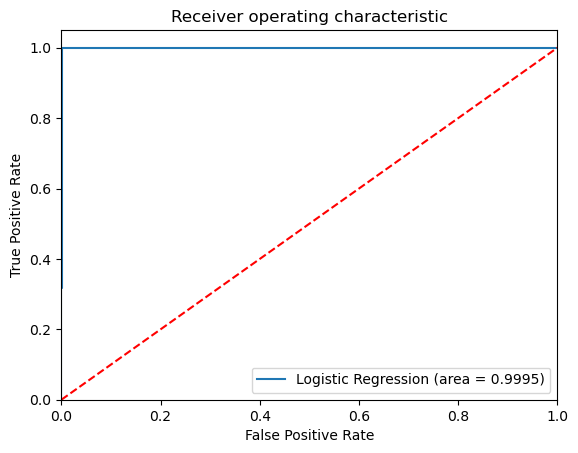

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Используем только столбцы из файла

In [9]:
X_new_droped, Y = data[all_splited], data['P_NED_ADR']

In [10]:
X_new_droped

,ACC_CHET_UL_FLG,OPEN_CHET_UL_CNT,HIGH_RISK_FLG,UL_UKL_FLG,ACC_OBJ_CNT,ACC_OBJ_CNT,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,...,UCHR_RUK_REG_CHANGE_CNT,UCHR_UCHR_REG_CHANGE_CNT,REGION_INEQ_UL_RUK_FLG,REGION_INEQ_UL_UCH_FLG,NO_OTCHET_FLG,BLOCKED_SCHET_UL_FLG,BLOCKED_SCHET_UL_CNT,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,RUK_PROVIDE_2NDFL_FLG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,23,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,0,0
97090,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,24,0,0,0
97091,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,20,0,0,0
97092,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,8,0,0,0


<AxesSubplot:>

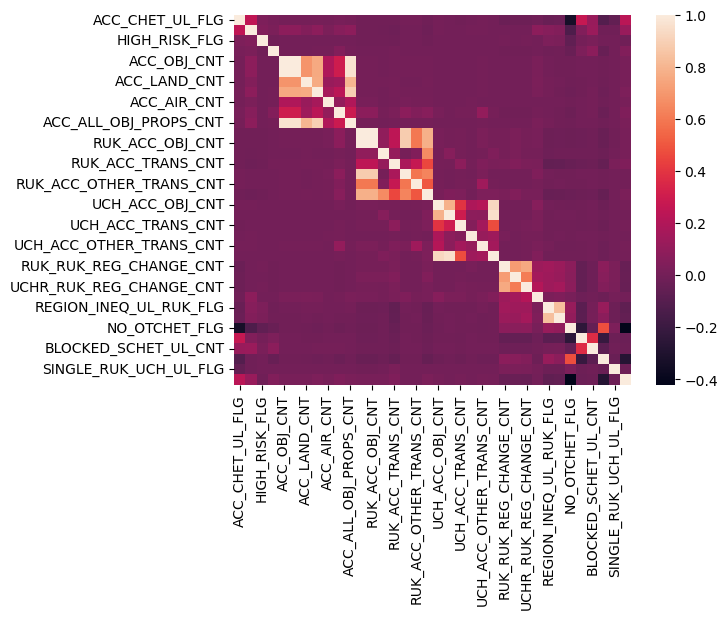

In [11]:
sns.heatmap(X_new_droped.corr())
#sns.heatmap(data.drop(['ID', 'DT_PROCESSING'], axis=1).corr())

Столбцы, которые очень сильно коррелируют между собой:

In [13]:
corr_gone = no_corr(X_new_droped, 0.8)
corr_gone 

['ACC_OBJ_CNT',
 'ACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_AIR_CNT',
 'UCH_ACC_ALL_OBJ_PROPS_CNT']

In [14]:
X_no_corr_droped = X_new_droped.drop(corr_gone, axis=1)

In [15]:
X_no_corr_droped

,ACC_CHET_UL_FLG,OPEN_CHET_UL_CNT,HIGH_RISK_FLG,UL_UKL_FLG,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,RUK_ACC_LAND_CNT,RUK_ACC_TRANS_CNT,...,UCHR_RUK_REG_CHANGE_CNT,UCHR_UCHR_REG_CHANGE_CNT,REGION_INEQ_UL_RUK_FLG,REGION_INEQ_UL_UCH_FLG,NO_OTCHET_FLG,BLOCKED_SCHET_UL_FLG,BLOCKED_SCHET_UL_CNT,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,RUK_PROVIDE_2NDFL_FLG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,23,0,0,0,42,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,2,...,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,0,0
97090,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,24,0,0,0
97091,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,20,0,0,0
97092,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,8,0,0,0


In [16]:
def binar_cols(df):
    binary_cols = []
    for xx in range(len(df.columns)):
        if len(data[df.columns[xx]].value_counts()) == 2:
            binary_cols.append(df.columns[xx])
    return binary_cols

In [17]:
binars = binar_cols(X_no_corr_droped)
binars

['ACC_CHET_UL_FLG',
 'HIGH_RISK_FLG',
 'UL_UKL_FLG',
 'REGION_INEQ_UL_RUK_FLG',
 'REGION_INEQ_UL_UCH_FLG',
 'NO_OTCHET_FLG',
 'BLOCKED_SCHET_UL_FLG',
 'SINGLE_RUK_UCH_FL_FLG',
 'SINGLE_RUK_UCH_UL_FLG',
 'RUK_PROVIDE_2NDFL_FLG']

In [18]:
def categ_cols(df):
    categ_cols = []
    for xx in range(len(df.columns)):
        if (len(data[df.columns[xx]].value_counts()) > 2) & (len(data[df.columns[xx]].value_counts()) < 20):
            categ_cols.append(df.columns[xx])
    return categ_cols

In [19]:
categs = categ_cols(X_no_corr_droped)
categs

['RUK_ACC_OTHER_TRANS_CNT',
 'RUK_RUK_REG_CHANGE_CNT',
 'UCHR_RUK_REG_CHANGE_CNT']

In [20]:
no_categs = list(X_no_corr_droped.drop(binars+categs, axis=1).columns)#.value_counts().plot(kind='barh')#.hist()
no_categs

['OPEN_CHET_UL_CNT',
 'ACC_LAND_CNT',
 'ACC_TRANS_CNT',
 'ACC_AIR_CNT',
 'ACC_OTHER_TRANS_CNT',
 'RUK_ACC_LAND_CNT',
 'RUK_ACC_TRANS_CNT',
 'RUK_ACC_ALL_OBJ_PROPS_CNT',
 'UCH_ACC_OBJ_CNT',
 'UCH_ACC_LAND_CNT',
 'UCH_ACC_TRANS_CNT',
 'UCH_ACC_AIR_CNT',
 'UCH_ACC_OTHER_TRANS_CNT',
 'RUK_UCHR_REG_CHANGE_CNT',
 'UCHR_UCHR_REG_CHANGE_CNT',
 'BLOCKED_SCHET_UL_CNT']

In [22]:
scaler = preprocessing.StandardScaler().fit(X_no_corr_droped[no_categs])
X_no_categs_scaled = pd.DataFrame(scaler.transform(X_no_corr_droped[no_categs]), columns=no_categs)
X_no_categs_scaled

,OPEN_CHET_UL_CNT,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,RUK_ACC_LAND_CNT,RUK_ACC_TRANS_CNT,RUK_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_LAND_CNT,UCH_ACC_TRANS_CNT,UCH_ACC_AIR_CNT,UCH_ACC_OTHER_TRANS_CNT,RUK_UCHR_REG_CHANGE_CNT,UCHR_UCHR_REG_CHANGE_CNT,BLOCKED_SCHET_UL_CNT
0,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.000800,-0.014468,-0.051174,-0.009601,-0.021838,-0.154565,-0.061626,-0.239165
1,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.005387,-0.273827,0.147310,0.015068,-0.009090,-0.051174,-0.009601,-0.021838,-0.154565,-0.061626,-0.183791
2,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.005387,-0.273827,-0.101861,-0.024602,-0.009090,-0.051174,-0.009601,-0.021838,-0.154565,-0.061626,-0.239165
3,-0.257817,-0.012663,0.629871,-0.010627,-0.029048,-0.092960,9.086374,1.991176,-0.000800,-0.014468,1.735022,-0.009601,-0.021838,-0.154565,-0.061626,-0.239165
4,-0.257817,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,0.171897,-0.101861,-0.032536,-0.014468,-0.004169,-0.009601,-0.021838,-0.154565,-0.061626,-0.183791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,-0.101256,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.151695,-0.024602,-0.014468,-0.051174,-0.009601,-0.021838,-0.154565,-0.061626,-0.017668
97090,0.211868,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,-0.051174,-0.009601,-0.021838,-0.154565,-0.061626,1.089816
97091,0.211868,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,-0.051174,-0.009601,-0.021838,-0.154565,-0.061626,0.868319
97092,-0.101256,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,-0.051174,-0.009601,-0.021838,-0.154565,-0.061626,0.203829


In [25]:
categ_frame = []
for c in range(len(categs)):
    categ_c = column_to_ohe(X_no_corr_droped[categs], categs[c])
    categ_frame.append(categ_c)

C:\Users\ivan\AppData\Local\Temp\ipykernel_13712\3562367698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].fillna(data[column_name].mode()[0])
C:\Users\ivan\AppData\Local\Temp\ipykernel_13712\3562367698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].fillna(data[column_name].mode()[0])
C:\Users\ivan\AppData\Local\Temp\ipykernel_13712\3562367698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [26]:
categ_frame[-1]

,UCHR_RUK_REG_CHANGE_CNT_0,UCHR_RUK_REG_CHANGE_CNT_1,UCHR_RUK_REG_CHANGE_CNT_2,UCHR_RUK_REG_CHANGE_CNT_3,UCHR_RUK_REG_CHANGE_CNT_4,UCHR_RUK_REG_CHANGE_CNT_5,UCHR_RUK_REG_CHANGE_CNT_6,UCHR_RUK_REG_CHANGE_CNT_7,UCHR_RUK_REG_CHANGE_CNT_8,UCHR_RUK_REG_CHANGE_CNT_9,UCHR_RUK_REG_CHANGE_CNT_10,UCHR_RUK_REG_CHANGE_CNT_11,UCHR_RUK_REG_CHANGE_CNT_12,UCHR_RUK_REG_CHANGE_CNT_13,UCHR_RUK_REG_CHANGE_CNT_15,UCHR_RUK_REG_CHANGE_CNT_16,UCHR_RUK_REG_CHANGE_CNT_17,UCHR_RUK_REG_CHANGE_CNT_20,UCHR_RUK_REG_CHANGE_CNT_32
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97090,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97091,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97092,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
X_new = X_no_categs_scaled.join(categ_frame).join(X_no_corr_droped[binars]).fillna(0)
X_new 

,OPEN_CHET_UL_CNT,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,RUK_ACC_LAND_CNT,RUK_ACC_TRANS_CNT,RUK_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_LAND_CNT,...,ACC_CHET_UL_FLG,HIGH_RISK_FLG,UL_UKL_FLG,REGION_INEQ_UL_RUK_FLG,REGION_INEQ_UL_UCH_FLG,NO_OTCHET_FLG,BLOCKED_SCHET_UL_FLG,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,RUK_PROVIDE_2NDFL_FLG
0,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.000800,-0.014468,...,0,0,0,0,0,0,0,0,0,0
1,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.005387,-0.273827,0.147310,0.015068,-0.009090,...,0,0,0,0,0,0,1,0,0,0
2,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.005387,-0.273827,-0.101861,-0.024602,-0.009090,...,0,0,0,0,0,0,0,0,0,0
3,-0.257817,-0.012663,0.629871,-0.010627,-0.029048,-0.092960,9.086374,1.991176,-0.000800,-0.014468,...,1,0,0,0,0,0,0,0,0,0
4,-0.257817,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,0.171897,-0.101861,-0.032536,-0.014468,...,1,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,-0.101256,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.151695,-0.024602,-0.014468,...,1,0,0,0,0,0,1,0,0,0
97090,0.211868,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,...,1,0,0,0,0,1,1,0,0,0
97091,0.211868,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,...,1,0,0,0,0,1,1,0,0,0
97092,-0.101256,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,...,1,0,0,0,0,1,1,0,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2, random_state=0)

In [29]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [30]:
model.score(X_test, y_test)

0.7845409135382873

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[14875,   246],
       [ 3938,   360]], dtype=int64)

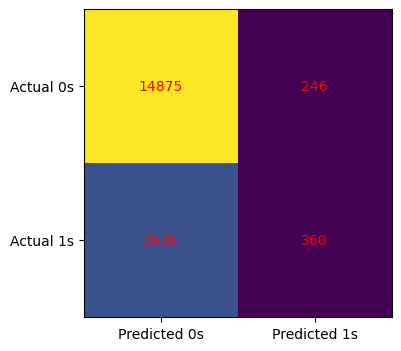

In [32]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [34]:
X_new.join(Y)

,OPEN_CHET_UL_CNT,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,RUK_ACC_LAND_CNT,RUK_ACC_TRANS_CNT,RUK_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_LAND_CNT,...,HIGH_RISK_FLG,UL_UKL_FLG,REGION_INEQ_UL_RUK_FLG,REGION_INEQ_UL_UCH_FLG,NO_OTCHET_FLG,BLOCKED_SCHET_UL_FLG,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,RUK_PROVIDE_2NDFL_FLG,P_NED_ADR
0,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.000800,-0.014468,...,0,0,0,0,0,0,0,0,0,0
1,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.005387,-0.273827,0.147310,0.015068,-0.009090,...,0,0,0,0,0,1,0,0,0,0
2,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.005387,-0.273827,-0.101861,-0.024602,-0.009090,...,0,0,0,0,0,0,0,0,0,1
3,-0.257817,-0.012663,0.629871,-0.010627,-0.029048,-0.092960,9.086374,1.991176,-0.000800,-0.014468,...,0,0,0,0,0,0,0,0,0,0
4,-0.257817,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,0.171897,-0.101861,-0.032536,-0.014468,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,-0.101256,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.151695,-0.024602,-0.014468,...,0,0,0,0,0,1,0,0,0,0
97090,0.211868,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,...,0,0,0,0,1,1,0,0,0,0
97091,0.211868,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,...,0,0,0,0,1,1,0,0,0,0
97092,-0.101256,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,...,0,0,0,0,1,1,0,0,0,0


In [49]:
import pandas as pd
import numpy as np
from keras.models import Sequential
import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from keras.layers.core import Dense
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import History 


def execute_method(data, n_hidden_, epochs_, eta_):
    
    col_list = list(data.columns)
    lists = []
    for k in np.arange(len(data.columns)):
        list_k = list(data[f'{col_list[k]}'])
        lists.append(list_k)
    
    X_train, y_train = list(zip(*lists[1:len(lists)-1])), [[lists[-1][i]] for i in range(len(lists[-1]))]
    
    y_train = np.asarray(y_train).astype('float32').reshape((-1,1))



    #ЗАДАЕМ ПОСЛЕДОВАТЕЛЬНОСТЬ СЛОЕВ
    model = tf.keras.Sequential()
    
    for layer in np.arange(len(n_hidden_)):
        model.add(tf.keras.layers.Dense(n_hidden_[layer]))
        model.add(tf.keras.layers.Activation('sigmoid'))

    #model.compile(loss='mse', optimizer='sgd')
    
    model.compile(loss=keras.losses.BinaryCrossentropy())

    fitting = model.fit(X_train, y_train, epochs = epochs_)
    
    hist_ = fitting.history
    
    return hist_ 

In [50]:
execute_method(X_new.join(Y), [10, 15, 5], 20, 0.001)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'tuple\'> containing values of types {"<class \'float\'>", "<class \'int\'>"})'}), <class 'numpy.ndarray'>